In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [4]:
#CSV 파일 읽어오기
input_file = '한국_기업문화_HR_데이터셋_샘플.csv'
df = pd.read_csv(input_file)

#데이터 전처리
# print(df.isna().sum())
# Nan 값이 없음 -> 결측치 처리 안함

#고유값 확인
'''
for col in df:
    print(df[col].unique())
'''

# 직원들의 이직과 관련된 내용들, 대부분 직원들의 개인 정보와 관련된 10가지 콜럼을 선택해서 새로운 데이터프레임을 만듦
df_change =  df[['Age', '집까지거리',  '근무환경만족도', '시간당급여',  '업무만족도', '월급여', '직급','학력수준','출장빈도', '야근여부', '이직여부']]

#콜럼 이름을 영어로 변환
col_name = ['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate', 'JobSatisfaction', 'MonthlyIncome', 'JobLevel', 'Education', 'BusinessTravel', 'OverTime', 'ChangeJobs']
df_change.columns = col_name

# 범주형 & 연속형 분류 함수 생성
def cat_num_classifier(df):
    df_num = df[['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate', 'JobSatisfaction', 'MonthlyIncome', 'JobLevel', 'Education']]
    df_cat = df[['BusinessTravel', 'OverTime', 'ChangeJobs']]

    #연속형 콜럼은 minmaxscaler적용
    mms = MinMaxScaler()
    df_num_mms = mms.fit_transform(df_num)
    df_num_mms = pd.DataFrame(df_num_mms, columns=df_num.columns)


    # 범주형 콜럼을 유지 혹은 labelencoder 적용
    le = LabelEncoder()
    for col in df_cat:
        if len(df_cat[col].unique()) <= 3:
            df_cat[col] = le.fit_transform(df_cat[col])

    # 범주형과 연속형 콜럼 결합
    df = pd.concat([df_num_mms, df_cat], axis=1)

    return df

df_pred = cat_num_classifier(df_change)
df_pred.head()


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25420\506925749.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col] = le.fit_transform(df_cat[col])
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25420\506925749.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col] = le.fit_transform(df_cat[col])
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25420\506925749.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,Age,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,JobLevel,Education,BusinessTravel,OverTime,ChangeJobs
0,0.238095,0.142857,1.000000,0.771429,0.000000,0.393061,0.25,0.50,2,0,0
1,0.833333,0.428571,1.000000,0.385714,0.000000,0.181449,0.25,0.25,2,0,0
2,0.142857,0.750000,1.000000,0.400000,0.666667,0.028791,0.00,0.00,2,0,1
3,0.642857,0.214286,0.333333,0.414286,0.000000,0.459555,0.50,0.50,2,0,0
4,0.428571,0.142857,1.000000,0.457143,0.333333,0.258648,0.25,0.25,2,0,0


In [5]:
# df를 numpy array로 변형
raw = df_pred
np_raw = raw.values
type(np_raw)

#머신러닝을 위한 데이터와 정답 콜럼 구분
X = df_pred.drop('ChangeJobs', axis=1)
y = df_pred['ChangeJobs']

# train test split모델으로 X와y값을 머신러닝 교육값과 테스트 값으로 분류
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Decision tree classifier을 통해 데이터 예측 점수를 확인
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
model.fit(X_train, y_train)

print('Score:', model.score(X_train, y_train))
print('Score:', model.score(X_test, y_test))

# accuracy score을 사용해 모델 예측 정확도 확인
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Test Accuracy is ", accuracy_score(y_test, y_pred)*100)

# 혼돈 행렬을 통해 데이터 예측 확인
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

from sklearn.linear_model import LogisticRegression  
  
model = LogisticRegression()  
model.fit(X_train, y_train)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=13, solver='liblinear', C=10.0)
log_reg.fit(X_train, y_train)

pred = log_reg.predict(X_test)
accuracy_score(y_test, pred)
confusion_matrix(y_test, pred)

Score: 0.8613333333333333
Score: 0.824
Test Accuracy is  82.39999999999999


array([[199,   9],
       [ 37,   5]], dtype=int64)

In [6]:
신입사원_데이터 = [
    {
        "Age": 29, "BusinessTravel": "Travel_Rarely", "Department": "Research & Development",
        "DistanceFromHome": 5, "Education": 3, "EducationField": "Life Sciences",
        "EnvironmentSatisfaction": 2, "Gender": "Male", "HourlyRate": 70,
        "JobInvolvement": 3, "JobLevel": 1, "JobRole": "Laboratory Technician",
        "JobSatisfaction": 2, "MaritalStatus": "Single", "MonthlyIncome": 2800,
        "NumCompaniesWorked": 1, "OverTime": "Yes", "PercentSalaryHike": 12,
        "PerformanceRating": 3, "RelationshipSatisfaction": 2, "StockOptionLevel": 0,
        "TotalWorkingYears": 4, "TrainingTimesLastYear": 2, "WorkLifeBalance": 2,
        "YearsAtCompany": 1, "YearsInCurrentRole": 1, "YearsSinceLastPromotion": 0,
        "YearsWithCurrManager": 1
    },
    {
        "Age": 42, "BusinessTravel": "Non-Travel", "Department": "Human Resources",
        "DistanceFromHome": 10, "Education": 4, "EducationField": "Human Resources",
        "EnvironmentSatisfaction": 3, "Gender": "Female", "HourlyRate": 85,
        "JobInvolvement": 3, "JobLevel": 3, "JobRole": "Human Resources",
        "JobSatisfaction": 4, "MaritalStatus": "Married", "MonthlyIncome": 5200,
        "NumCompaniesWorked": 2, "OverTime": "No", "PercentSalaryHike": 14,
        "PerformanceRating": 3, "RelationshipSatisfaction": 3, "StockOptionLevel": 1,
        "TotalWorkingYears": 18, "TrainingTimesLastYear": 3, "WorkLifeBalance": 3,
        "YearsAtCompany": 7, "YearsInCurrentRole": 4, "YearsSinceLastPromotion": 1,
        "YearsWithCurrManager": 3
    },
    {
        "Age": 35, "BusinessTravel": "Travel_Frequently", "Department": "Sales",
        "DistanceFromHome": 2, "Education": 2, "EducationField": "Marketing",
        "EnvironmentSatisfaction": 1, "Gender": "Male", "HourlyRate": 65,
        "JobInvolvement": 2, "JobLevel": 2, "JobRole": "Sales Executive",
        "JobSatisfaction": 1, "MaritalStatus": "Single", "MonthlyIncome": 3300,
        "NumCompaniesWorked": 3, "OverTime": "Yes", "PercentSalaryHike": 11,
        "PerformanceRating": 3, "RelationshipSatisfaction": 2, "StockOptionLevel": 0,
        "TotalWorkingYears": 10, "TrainingTimesLastYear": 2, "WorkLifeBalance": 2,
        "YearsAtCompany": 2, "YearsInCurrentRole": 1, "YearsSinceLastPromotion": 1,
        "YearsWithCurrManager": 1
    }
]

# 데이터셋에서 필요한 행들을 분리
employee_data = []
col_name1 = ['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate', 'JobSatisfaction', 'MonthlyIncome', 'JobLevel', 'Education', 'BusinessTravel', 'OverTime']

for idx, dictn in enumerate(신입사원_데이터):
    employee_value = {}
    for col in col_name1:
        if col in dictn.keys():
            employee_value[col] = 신입사원_데이터[idx][col]
    employee_data.append(employee_value)

df_employee = pd.DataFrame(employee_data)


num_df = df_employee[['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate', 'JobSatisfaction', 'MonthlyIncome', 'JobLevel', 'Education']]
cat_df = df_employee[['BusinessTravel', 'OverTime']]

mms = MinMaxScaler()
num_df_mms = mms.fit_transform(num_df)
num_df_mms = pd.DataFrame(num_df_mms, columns=num_df.columns)

le = LabelEncoder()
for col in cat_df:
    cat_df[col] = le.fit_transform(cat_df[col])

change_df = pd.concat([num_df_mms, cat_df], axis=1)


tom = change_df.iloc[0].tolist()
cath = change_df.iloc[1].tolist()
jerry = change_df.iloc[2].tolist()


print(model.predict_proba([tom]))
print(model.predict_proba([cath]))
print(model.predict_proba([jerry]))

[[0.37466575 0.62533425]]
[[0.99340647 0.00659353]]
[[0.41326234 0.58673766]]


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25420\3017144467.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df[col] = le.fit_transform(cat_df[col])
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25420\3017144467.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df[col] = le.fit_transform(cat_df[col])
c:\Users\kdecs\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with featur

OverTime                   1.704629
JobLevel                  -1.500312
EnvironmentSatisfaction   -1.296455
JobSatisfaction           -1.027446
DistanceFromHome           0.940854
Age                       -0.548893
MonthlyIncome             -0.518679
Education                 -0.445238
HourlyRate                -0.372464
BusinessTravel             0.003832
dtype: float64


<Axes: >

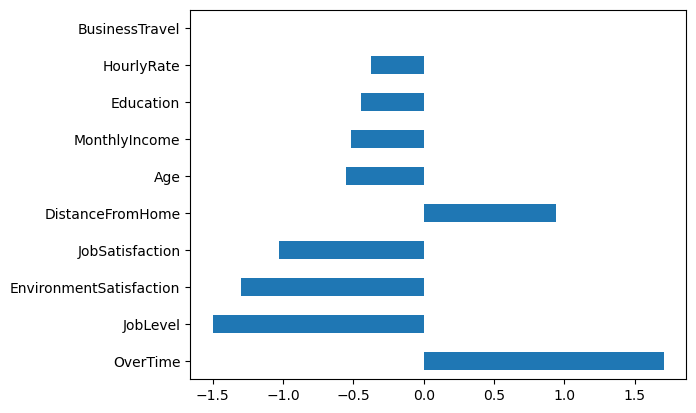

In [7]:
# 모델 훈련 후
coefficients = model.coef_[0]
features = X_train.columns
importance = pd.Series(coefficients, index=features).sort_values(key=abs, ascending=False)
print(importance)
importance.plot(kind='barh')

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.92      0.90       208
           1       0.47      0.33      0.39        42

    accuracy                           0.82       250
   macro avg       0.67      0.63      0.64       250
weighted avg       0.80      0.82      0.81       250

